In [1]:
# load smaller sample of UC Merced dataset, and run the example CIFAR network

### PREAMBLE ################################################################
# allows the images to be displayed in the jupyter notebook
%matplotlib inline

# torch and torchvision related
import torch
import torchvision as tv
import torchvision.transforms as transforms
import torchvision.datasets as datasets

from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# image library
from PIL import Image

# some numeric stuff
import numpy as np
import random
import matplotlib.pyplot as plt

# file input/output libraries
import fnmatch
import os

# set radom seed
random.seed(123);

### PATHS ###################################################################

pathTrain = './data/UCMerced_4Classes/train/'
pathTest = './data/UCMerced_4Classes/test/'

### GET LIST OF 10 FILES FROM EACH CLASS ####################################
# These I move manually into the "test" folder
# You can also do it automatically (and should, for all the classes!!)

# pathTrainImages = './data/UCMerced_4Classes/train/'
# classes = ['beach', 'forest', 'freeway', 'mediumresidential']

#for k in range(0,4):
#     indices = sorted(random.sample(range(0,100), 10))
#     print(indices)
#     allFiles = fnmatch.filter(os.listdir(pathTrainImages+classes[k]), '*.tif');
#     print(np.array(allFiles)[np.array(indices)])

In [2]:
# ### CONVERT IMAGES FROM .tif TO .png ########################################
# # ugly code, should make function rather than copy the same lines of code
# # for Train and Test, as can easily make mistakes

# classes = ['beach', 'forest', 'freeway', 'mediumresidential']

#for k in range(0,4):
#     allTrainFiles = fnmatch.filter(os.listdir(pathTrain+classes[k]), '*.tif');
#     allTestFiles = fnmatch.filter(os.listdir(pathTest+classes[k]), '*.tif');
#     print(k)
#     print(allTrainFiles)
#     for j in range(0,len(allTrainFiles)):
#         img = Image.open(pathTrain+classes[k]+'/'+allTrainFiles[j])
#         newName = os.path.splitext(pathTrain+classes[k]+'/'+allTrainFiles[j])[0]+'.png'
#         img.save(newName)
#     for j in range(0,len(allTestFiles)):
#         img = Image.open(pathTest+classes[k]+'/'+allTestFiles[j])
#         newName = os.path.splitext(pathTest+classes[k]+'/'+allTestFiles[j])[0]+'.png'
#         img.save(newName)

In [5]:
img = image.open(pathTrain+'beach/beach00.png')
type(im)

NameError: name 'image' is not defined

In [10]:
# write what the transforms should be
# From website: Normalize an tensor image with mean and standard deviation. 
# Given mean: (M1,...,Mn)  and std: (S1,..,Sn) for n channels, this transform 
# will normalize each channel of the input
# for some reason resize has to come before ToTensor
transform = transforms.Compose(
    [transforms.Resize(size=32),
     transforms.ToTensor(), 
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# load the train and test dataset
trainset = datasets.ImageFolder(root=pathTrain,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,shuffle=True, num_workers=2)

testset = datasets.ImageFolder(root=pathTest, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,shuffle=True, num_workers=2)

classes = ('beach', 'forest', 'freeway', 'mediumresidential')

mediumresidential freeway mediumresidential forest


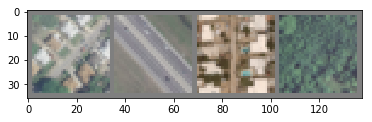

In [11]:
### PRINT IMAGES TO SCREEN TO VISUALIZE ####################################

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(tv.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [139]:
### NETWORK ARCHITECTURE #############################################

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 4)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [140]:
# print out the network structure
net

Net(
  (conv1): Conv2d (3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv2): Conv2d (6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120)
  (fc2): Linear(in_features=120, out_features=84)
  (fc3): Linear(in_features=84, out_features=4)
)

In [141]:
### TRAIN NETWORK ######################################################

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(3):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 5 == 4:    # print every 5 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,     5] loss: 0.004
[1,    10] loss: 0.003
[1,    15] loss: 0.003
[1,    20] loss: 0.003
[1,    25] loss: 0.003
[1,    30] loss: 0.003
[1,    35] loss: 0.003
[1,    40] loss: 0.003
[1,    45] loss: 0.003
[1,    50] loss: 0.003
[1,    55] loss: 0.003
[1,    60] loss: 0.003
[1,    65] loss: 0.003
[1,    70] loss: 0.003
[1,    75] loss: 0.003
[1,    80] loss: 0.003
[1,    85] loss: 0.003
[1,    90] loss: 0.003
[2,     5] loss: 0.003
[2,    10] loss: 0.003
[2,    15] loss: 0.003
[2,    20] loss: 0.003
[2,    25] loss: 0.003
[2,    30] loss: 0.003
[2,    35] loss: 0.003
[2,    40] loss: 0.003
[2,    45] loss: 0.003
[2,    50] loss: 0.003
[2,    55] loss: 0.003
[2,    60] loss: 0.003
[2,    65] loss: 0.003
[2,    70] loss: 0.003
[2,    75] loss: 0.003
[2,    80] loss: 0.003
[2,    85] loss: 0.003
[2,    90] loss: 0.003
[3,     5] loss: 0.003
[3,    10] loss: 0.003
[3,    15] loss: 0.003
[3,    20] loss: 0.003
[3,    25] loss: 0.003
[3,    30] loss: 0.003
[3,    35] loss: 0.003
[3,    40] 

GroundTruth:  mediumresidential beach freeway mediumresidential
Predicted:  mediumresidential mediumresidential freeway mediumresidential


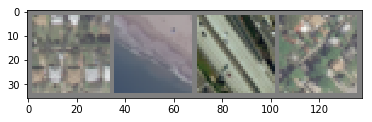

In [142]:
### CHECK ON TEST DATA ###############################################

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

outputs = net(Variable(images))
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))